<a href="https://colab.research.google.com/github/ronish645/RRRonishMATH208/blob/main/MATH208_Hw2_19707_Ronish_Shrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics for Glucose:
Mean: 130.06666666666666
Standard Deviation: 32.787648361196496
Median: 122.0
Q1: 107
Q3: 147
Z-Scores: [0.5469539363047783, -1.3745013417919332, 1.6144290908029513, -1.2525041812778563, 0.21146174489106678, -0.4290233478078371, -1.5879963726915678, -0.4595226379363563, 2.0414191526022205, -0.15452973665116398, -0.6120190885789525, 1.156939738875163, 0.27246032514810525, 1.7974248315740669, 1.0959411586181245, -0.9170119898641448, -0.3680247675507986, -0.7035169589645102, -0.8255141194785871, -0.4595226379363563, -0.12403044652264475, -0.9475112799926639, 2.0109198624737012, -0.33752547742227934, 0.39445748566218214, -0.15452973665116398, 0.5164546461762591, -1.0085098602497025, 0.4554560659192206, -0.3985240576793178]

Statistics for Blood Pressure:
Mean: 68.53333333333333
Standard Deviation: 23.91902046969911
Median: 73.0
Q1: 66
Q3: 84
Z-Scores: [0.14493347129571138, -0.10591292133148125, -0.18952838554054546, -0.10591292133148125, -1.1929139560493158, 0.22854

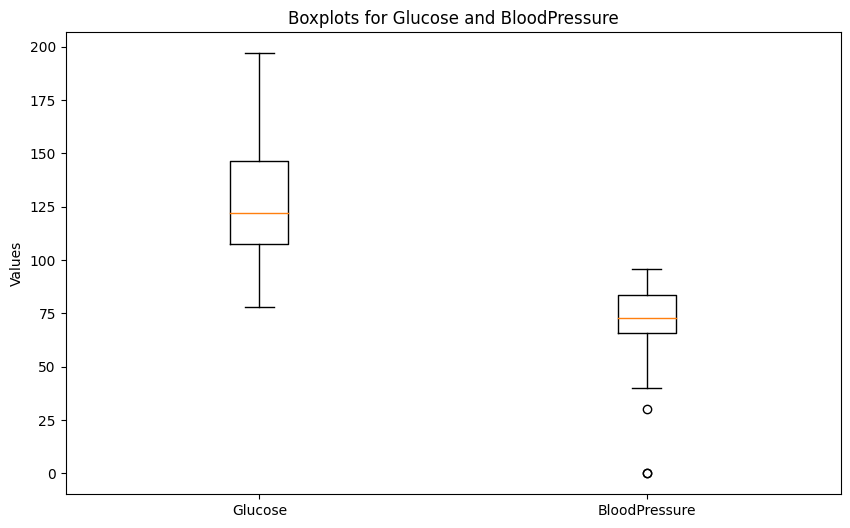

In [31]:
import openpyxl
import matplotlib.pyplot as plt

# Load the Excel file
mydata = openpyxl.load_workbook("original_diabetes.xlsx")
sheet = mydata.active

# Extract data from "Glucose" and "BloodPressure" columns, removing None values
glucose_mydata = [cell.value for cell in sheet['B'][1:] if cell.value is not None]
blood_pressure_mydata = [cell.value for cell in sheet['C'][1:] if cell.value is not None]

# Define functions for statistics
def calculate_mean(mydata):
    return sum(mydata) / len(mydata) if mydata else 0

def calculate_std_deviation(mydata):
    mean = calculate_mean(mydata)
    return (sum((x - mean) ** 2 for x in mydata) / (len(mydata) - 1)) ** 0.5 if len(mydata) > 1 else 0

def calculate_median(mydata):
    sorted_data = sorted(mydata)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

def calculate_quartiles(mydata):
    sorted_data = sorted(mydata)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        q1 = calculate_median(sorted_data[:mid])
        q3 = calculate_median(sorted_data[mid:])
    else:
        q1 = calculate_median(sorted_data[:mid])
        q3 = calculate_median(sorted_data[mid + 1:])
    return q1, q3

def calculate_z_scores(mydata):
    mean = calculate_mean(mydata)
    std_dev = calculate_std_deviation(mydata)
    return [(x - mean) / std_dev for x in mydata]

# Calculate statistics for Glucose
glucose_mean = calculate_mean(glucose_mydata)
glucose_std_dev = calculate_std_deviation(glucose_mydata)
glucose_median = calculate_median(glucose_mydata)
glucose_q1, glucose_q3 = calculate_quartiles(glucose_mydata)
glucose_z_scores = calculate_z_scores(glucose_mydata)

# Calculate statistics for Blood Pressure
bp_mean = calculate_mean(blood_pressure_mydata)
bp_std_dev = calculate_std_deviation(blood_pressure_mydata)
bp_median = calculate_median(blood_pressure_mydata)
bp_q1, bp_q3 = calculate_quartiles(blood_pressure_mydata)
bp_z_scores = calculate_z_scores(blood_pressure_mydata)

# Print the statistics
print("Statistics for Glucose:")
print(f"Mean: {glucose_mean}")
print(f"Standard Deviation: {glucose_std_dev}")
print(f"Median: {glucose_median}")
print(f"Q1: {glucose_q1}")
print(f"Q3: {glucose_q3}")
print(f"Z-Scores: {glucose_z_scores}\n")

print("Statistics for Blood Pressure:")
print(f"Mean: {bp_mean}")
print(f"Standard Deviation: {bp_std_dev}")
print(f"Median: {bp_median}")
print(f"Q1: {bp_q1}")
print(f"Q3: {bp_q3}")
print(f"Z-Scores: {bp_z_scores}")

# Create boxplots
plt.figure(figsize=(10, 6))
plt.boxplot([glucose_mydata, blood_pressure_mydata], labels=["Glucose", "BloodPressure"])
plt.title("Boxplots for Glucose and BloodPressure")
plt.ylabel("Values")
plt.show()


In [32]:
import random

def create_random_numbers(n):
    return [random.uniform(-20, 20) for _ in range(n)]

def verify_Chebyshev_ineq(lst, k):
    u = sum(lst) / len(lst)  # Calculate mean
    sd = (sum((x - u) ** 2 for x in lst) / len(lst)) ** 0.5  # Calculate standard deviation

    # Calculate the range [u - k*sd, u + k*sd]
    lower_bound = u - k * sd
    upper_bound = u + k * sd

    # Count how many numbers are within the range [u - k*sd, u + k*sd]
    count = sum(1 for x in lst if lower_bound <= x <= upper_bound)

    # Calculate the probability of |X - u| < k*sd
    prob = count / len(lst)

    # Check if the inequality holds
    inequality_verified = prob >= (1 - 1/(k**2))

    print(f"Probability of |X-u| = {prob} ; 1-1/(k^2) = {1 - 1/(k**2)}")
    print(f"When k = {k} , P(|X-u| < k*sd) >= 1-1/k^2 is {inequality_verified}\n")

    return count

# Test cases
random_numbers = create_random_numbers(50)

k_values = [1, 2**0.5, 1.5, 2, 3]
for k in k_values:
    cnt = verify_Chebyshev_ineq(random_numbers, k)


Probability of |X-u| = 0.58 ; 1-1/(k^2) = 0.0
When k = 1 , P(|X-u| < k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 0.8 ; 1-1/(k^2) = 0.5000000000000001
When k = 1.4142135623730951 , P(|X-u| < k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 0.84 ; 1-1/(k^2) = 0.5555555555555556
When k = 1.5 , P(|X-u| < k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 1.0 ; 1-1/(k^2) = 0.75
When k = 2 , P(|X-u| < k*sd) >= 1-1/k^2 is True

Probability of |X-u| = 1.0 ; 1-1/(k^2) = 0.8888888888888888
When k = 3 , P(|X-u| < k*sd) >= 1-1/k^2 is True



slope (b1) = 141.21212121212122
y-intercept(b0) = -466.8787878787879
Coefficient of linear correlation r = 0.943579551890278


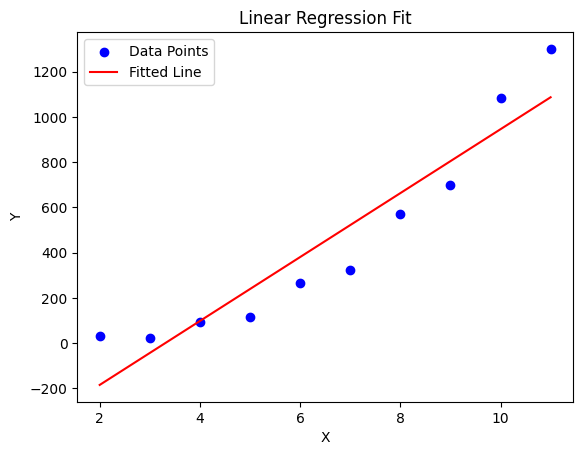

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
Y = np.array([30, 25, 95, 115, 265, 325, 570, 700, 1085, 1300])

# Calculate mean of X and Y
mean_X = sum(X)/len(X)
mean_Y = sum(Y)/len(Y)


# Calculate b1 and b0
b1 = np.sum((X - mean_X) * (Y - mean_Y)) / np.sum((X - mean_X)**2)
b0 = mean_Y - b1 * mean_X

# Calculate coefficient of linear correlation r
r = np.sum((X - mean_X) * (Y - mean_Y)) / (np.sqrt(np.sum((X - mean_X)**2)) * np.sqrt(np.sum((Y - mean_Y)**2)))

# Print the values of b1, b0, and r
print("slope (b1) =", b1)
print("y-intercept(b0) =", b0)
print("Coefficient of linear correlation r =", r)

# Plotting the data and the fitted line
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, b0 + b1*X, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
